# Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configure visualization aesthetics

In [4]:
sns.set_theme(style="whitegrid", context="notebook")

# Load the dataset

In [5]:
data = pd.read_csv('titanic.csv')

# Display basic dataset information

In [6]:
print("\nFirst 5 Rows of the Dataset:")
print(data.head())


First 5 Rows of the Dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37345

# Check missing values in each column

In [7]:
print("\nPercentage of Missing Values per Column:")
for col in data.columns:
    percent_missing = np.mean(data[col].isnull())
    print(f'{col}: {round(percent_missing * 100, 2)}%')


Percentage of Missing Values per Column:
PassengerId: 0.0%
Survived: 0.0%
Pclass: 0.0%
Name: 0.0%
Sex: 0.0%
Age: 19.87%
SibSp: 0.0%
Parch: 0.0%
Ticket: 0.0%
Fare: 0.0%
Cabin: 77.1%
Embarked: 0.22%


# Data Cleaning: Removing duplicates and dropping rows with missing values

In [8]:
data = data.dropna()
data = data.drop_duplicates()

# Check missing values in each column after cleaning

In [9]:
print("\nPercentage of Missing Values After Cleaning:")
for col in data.columns:
    percent_missing = np.mean(data[col].isnull())
    print(f'{col}: {round(percent_missing * 100, 2)}%')


Percentage of Missing Values After Cleaning:
PassengerId: 0.0%
Survived: 0.0%
Pclass: 0.0%
Name: 0.0%
Sex: 0.0%
Age: 0.0%
SibSp: 0.0%
Parch: 0.0%
Ticket: 0.0%
Fare: 0.0%
Cabin: 0.0%
Embarked: 0.0%


# Exploratory Data Analysis (EDA)

# 1. Distribution of Passenger Classes

C:\Users\kacpe\AppData\Local\Temp\ipykernel_18052\3896498.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=data, palette='pastel', edgecolor='black')


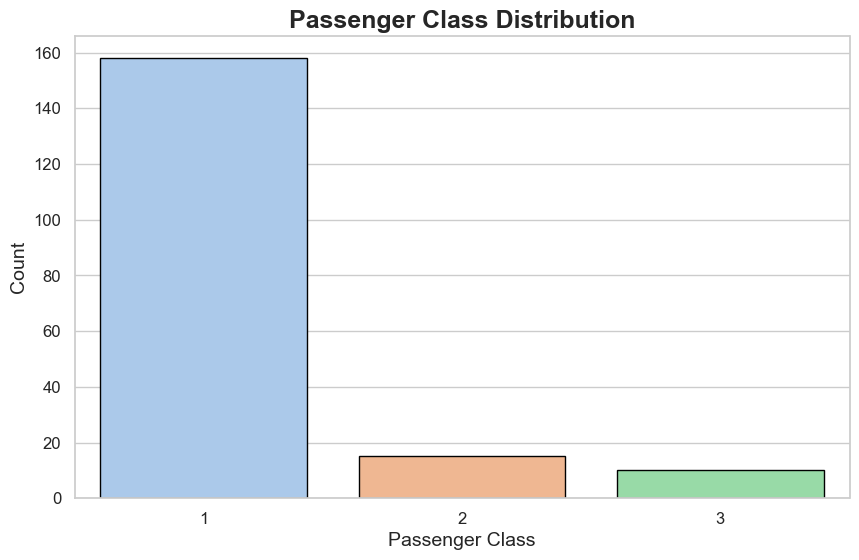

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=data, palette='pastel', edgecolor='black')
plt.title('Passenger Class Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 2. Gender Distribution

C:\Users\kacpe\AppData\Local\Temp\ipykernel_18052\1525605321.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=data, palette='cool', edgecolor='black')


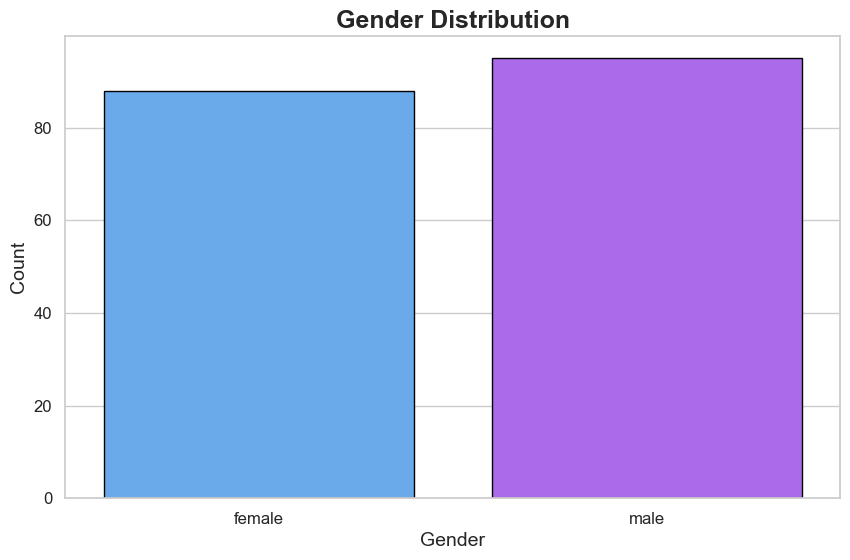

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=data, palette='cool', edgecolor='black')
plt.title('Gender Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 3. Survival Analysis by Class and Gender

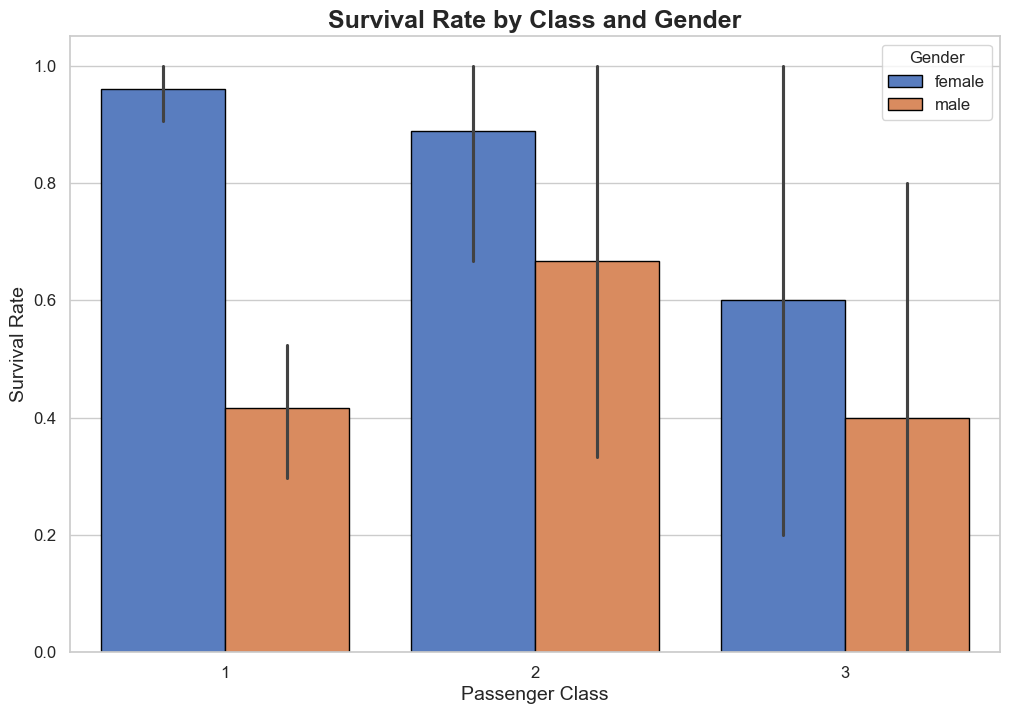

In [12]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=data, palette='muted', edgecolor='black')
plt.title('Survival Rate by Class and Gender', fontsize=18, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.legend(title='Gender', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 4. Age Distribution

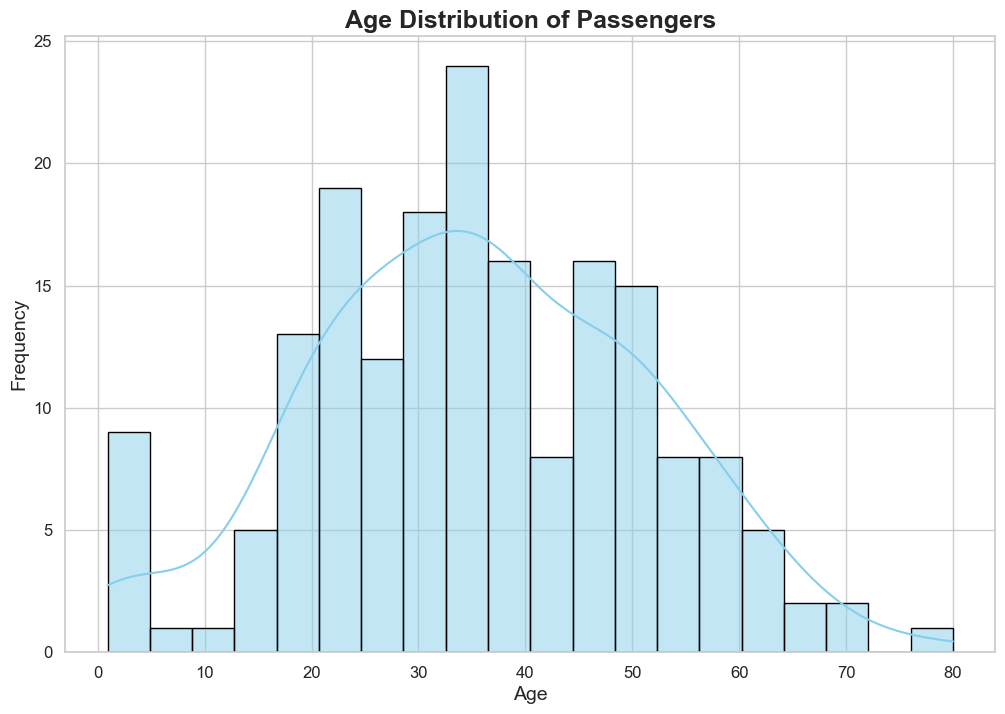

In [13]:
plt.figure(figsize=(12, 8))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Passengers', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 5. Survival by Age

C:\Users\kacpe\AppData\Local\Temp\ipykernel_18052\980286417.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Survived'] == 1]['Age'], label='Survived', shade=True, color='green')
C:\Users\kacpe\AppData\Local\Temp\ipykernel_18052\980286417.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Survived'] == 0]['Age'], label='Did Not Survive', shade=True, color='red')


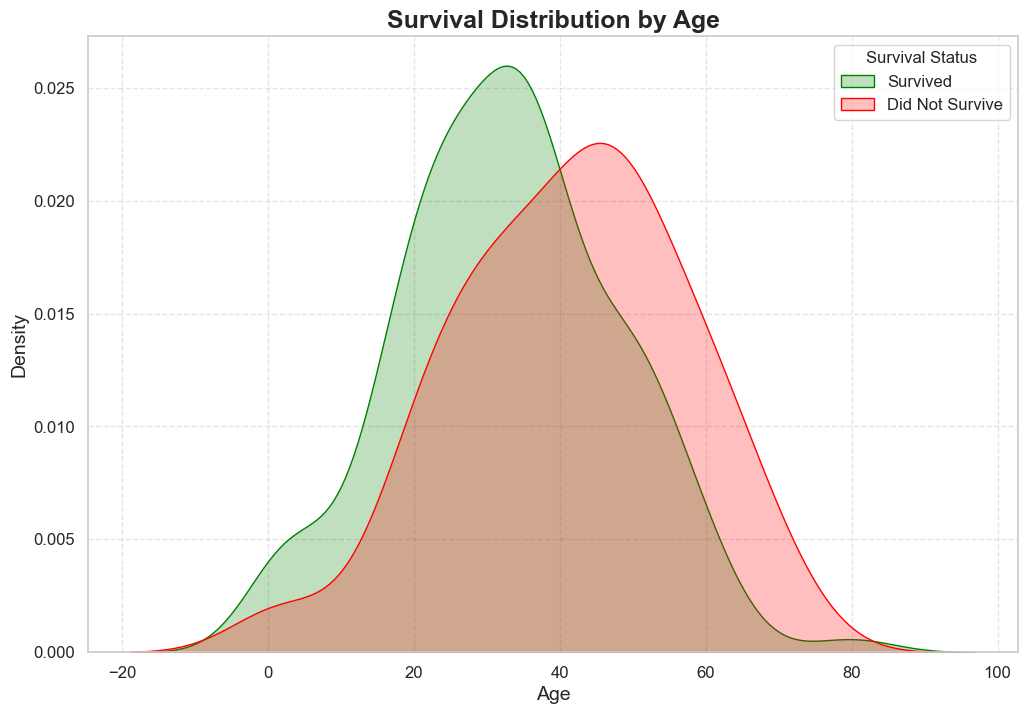

In [14]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=data[data['Survived'] == 1]['Age'], label='Survived', shade=True, color='green')
sns.kdeplot(data=data[data['Survived'] == 0]['Age'], label='Did Not Survive', shade=True, color='red')
plt.title('Survival Distribution by Age', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Survival Status', fontsize=12)
plt.grid(linestyle="--", alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 6. Fare Distribution by Survival Status

C:\Users\kacpe\AppData\Local\Temp\ipykernel_18052\544161393.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=data, palette='Set2', linewidth=1.5)


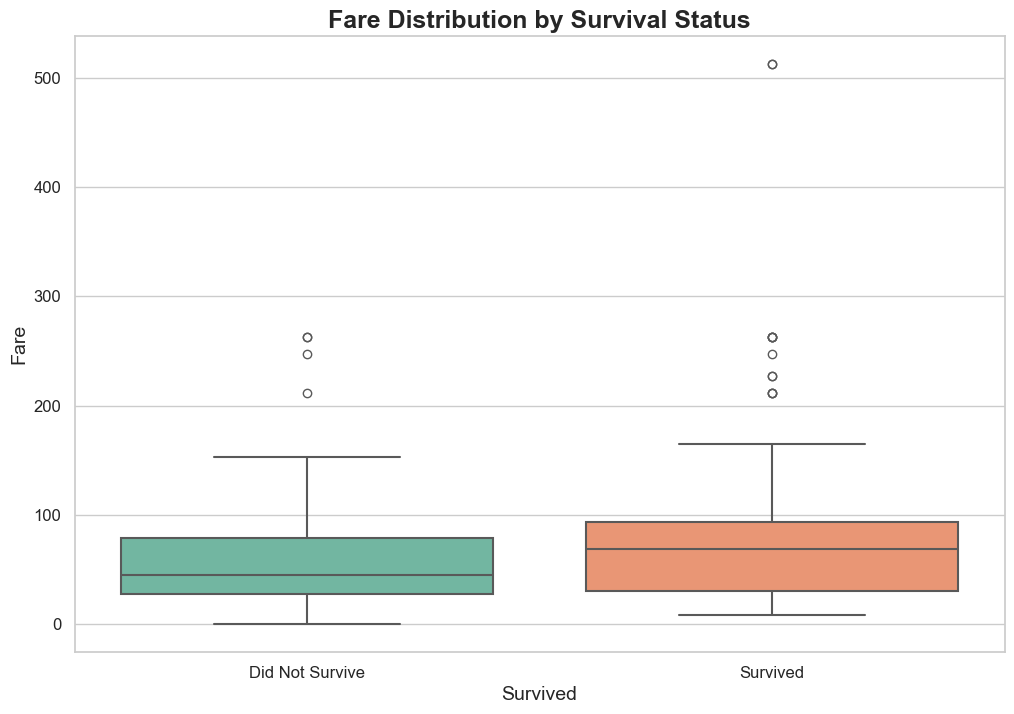

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Survived', y='Fare', data=data, palette='Set2', linewidth=1.5)
plt.title('Fare Distribution by Survival Status', fontsize=18, fontweight='bold')
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Fare', fontsize=14)
plt.xticks([0, 1], ['Did Not Survive', 'Survived'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Conclusion

In [16]:
print("\nAnalysis Complete. Enhanced visualizations and insights provided.")


Analysis Complete. Enhanced visualizations and insights provided.
